In [2]:
from graphviz import Digraph

In [3]:
from collections import namedtuple
Genotype = namedtuple('Genotype', 'normal normal_concat reduce reduce_concat')

In [4]:
def plot(genotype, filename):
  g = Digraph(
      format='pdf',
      edge_attr=dict(fontsize='20', fontname="times"),
      node_attr=dict(style='filled', shape='rect', align='center', fontsize='20', height='0.5', width='0.5', penwidth='2', fontname="times"),
      engine='dot')
  g.body.extend(['rankdir=LR'])

  g.node("c_{k-2}", fillcolor='darkseagreen2')
  g.node("c_{k-1}", fillcolor='darkseagreen2')
  assert len(genotype) % 2 == 0
  steps = len(genotype) // 2

  for i in range(steps):
    g.node(str(i), fillcolor='lightblue')

  for i in range(steps):
    for k in [2*i, 2*i + 1]:
      op, j = genotype[k]
      if j == 0:
        u = "c_{k-2}"
      elif j == 1:
        u = "c_{k-1}"
      else:
        u = str(j-2)
      v = str(i)
      g.edge(u, v, label=op, fillcolor="gray")

  g.node("c_{k}", fillcolor='palegoldenrod')
  for i in range(steps):
    g.edge(str(i), "c_{k}", fillcolor="gray")

  g.render(filename, view=True)

In [5]:
genotype = Genotype(normal=[('max_pool_3x3', 1), ('sep_conv_5x5', 0), ('max_pool_3x3', 2), ('sep_conv_5x5', 0), ('sep_conv_5x5', 3), ('sep_conv_5x5', 0), ('sep_conv_5x5', 3), ('sep_conv_5x5', 0)], normal_concat=range(2, 6), reduce=[('skip_connect', 1), ('sep_conv_3x3', 0), ('sep_conv_3x3', 1), ('sep_conv_5x5', 0), ('max_pool_3x3', 3), ('sep_conv_5x5', 2), ('sep_conv_5x5', 4), ('sep_conv_5x5', 0)], reduce_concat=range(2, 6))

In [6]:
DARTS_V1 = Genotype(
    normal=[('sep_conv_3x3', 1), ('sep_conv_3x3', 0), ('skip_connect', 0), ('sep_conv_3x3', 1), ('skip_connect', 0),
            ('sep_conv_3x3', 1), ('sep_conv_3x3', 0), ('skip_connect', 2)], normal_concat=[2, 3, 4, 5],
    reduce=[('max_pool_3x3', 0), ('max_pool_3x3', 1), ('skip_connect', 2), ('max_pool_3x3', 0), ('max_pool_3x3', 0),
            ('skip_connect', 2), ('skip_connect', 2), ('avg_pool_3x3', 0)], reduce_concat=[2, 3, 4, 5])

In [14]:
DARTS_V1.normal

[('sep_conv_3x3', 1),
 ('sep_conv_3x3', 0),
 ('skip_connect', 0),
 ('sep_conv_3x3', 1),
 ('skip_connect', 0),
 ('sep_conv_3x3', 1),
 ('sep_conv_3x3', 0),
 ('skip_connect', 2)]

In [8]:
a, b = zip(*DARTS_V1.normal)

In [16]:
b

(1, 0, 0, 1, 0, 1, 0, 2)

In [9]:
a

('sep_conv_3x3',
 'sep_conv_3x3',
 'skip_connect',
 'sep_conv_3x3',
 'skip_connect',
 'sep_conv_3x3',
 'sep_conv_3x3',
 'skip_connect')

In [10]:
FairDARTS_a = Genotype(normal=[('sep_conv_3x3', 2, 0), ('sep_conv_5x5', 2, 1), ('max_pool_3x3', 4, 0), ('sep_conv_3x3', 5, 0)], normal_concat=range(2, 6),
         reduce=[('max_pool_3x3', 2, 0), ('avg_pool_3x3', 2, 1), ('avg_pool_3x3', 3, 0), ('dil_conv_5x5', 3, 1), ('avg_pool_3x3', 4, 0), ('sep_conv_5x5', 4, 1),
                 ('skip_connect', 5, 0), ('skip_connect', 5, 1)], reduce_concat=range(2, 6))

In [18]:
gr = FairDARTS_a.normal

In [19]:
gr

[('sep_conv_3x3', 2, 0),
 ('sep_conv_5x5', 2, 1),
 ('max_pool_3x3', 4, 0),
 ('sep_conv_3x3', 5, 0)]

In [20]:
a,b = zip(*gr)

ValueError: too many values to unpack (expected 2)

In [1]:
DARTS_Arch0 = Genotype(normal=[('sep_conv_3x3', 1), ('sep_conv_3x3', 0), ('sep_conv_3x3', 1), ('sep_conv_5x5', 0), ('sep_conv_3x3', 1), ('sep_conv_3x3', 0), ('skip_connect', 0), ('sep_conv_3x3', 1)], normal_concat=range(2, 6), reduce=[('sep_conv_3x3', 0), ('sep_conv_3x3', 1), ('skip_connect', 0), ('dil_conv_3x3', 2), ('skip_connect', 0), ('avg_pool_3x3', 1), ('skip_connect', 2), ('skip_connect', 0)], reduce_concat=range(2, 6))

NameError: name 'Genotype' is not defined

In [7]:
PCDARTS_natural = Genotype(
    normal=[('sep_conv_5x5', 0), ('sep_conv_3x3', 1), ('dil_conv_3x3', 0), ('sep_conv_5x5', 2), ('dil_conv_5x5', 0),
            ('dil_conv_3x3', 1), ('dil_conv_3x3', 0), ('skip_connect', 1)], normal_concat=range(2, 6),
    reduce=[('dil_conv_5x5', 1), ('dil_conv_5x5', 0), ('sep_conv_3x3', 2), ('skip_connect', 1), ('sep_conv_3x3', 1),
            ('skip_connect', 0), ('sep_conv_3x3', 2), ('dil_conv_5x5', 4)], reduce_concat=range(2, 6))

In [8]:
PCDART_FGSM_es = Genotype(
    normal=[('sep_conv_3x3', 0), ('skip_connect', 1), ('sep_conv_3x3', 1), ('skip_connect', 2), ('sep_conv_5x5', 0),
            ('sep_conv_5x5', 3), ('max_pool_3x3', 2), ('sep_conv_5x5', 0)], normal_concat=range(2, 6),
    reduce=[('sep_conv_5x5', 0), ('avg_pool_3x3', 1), ('sep_conv_3x3', 0), ('skip_connect', 2), ('sep_conv_5x5', 0),
            ('sep_conv_3x3', 3), ('sep_conv_5x5', 0), ('sep_conv_5x5', 2)], reduce_concat=range(2, 6))

In [9]:
PCDARTS_FGSM = Genotype(
    normal=[('skip_connect', 0), ('skip_connect', 1), ('skip_connect', 1), ('skip_connect', 0), ('sep_conv_5x5', 0),
            ('skip_connect', 3), ('avg_pool_3x3', 0), ('max_pool_3x3', 2)], normal_concat=range(2, 6),
    reduce=[('avg_pool_3x3', 1), ('sep_conv_3x3', 0), ('sep_conv_3x3', 0), ('dil_conv_5x5', 2), ('sep_conv_3x3', 0),
            ('sep_conv_3x3', 3), ('sep_conv_5x5', 0), ('sep_conv_3x3', 2)], reduce_concat=range(2, 6))

In [10]:
PCDARTS_CAA_noise_FGSM = Genotype(
    normal=[('sep_conv_3x3', 1), ('dil_conv_5x5', 0), ('max_pool_3x3', 2), ('sep_conv_3x3', 1), ('sep_conv_3x3', 2),
            ('sep_conv_3x3', 1), ('sep_conv_3x3', 2), ('sep_conv_3x3', 0)], normal_concat=range(2, 6),
    reduce=[('sep_conv_3x3', 0), ('sep_conv_3x3', 1), ('sep_conv_3x3', 0), ('dil_conv_5x5', 2), ('sep_conv_5x5', 2),
            ('max_pool_3x3', 3), ('max_pool_3x3', 3), ('sep_conv_3x3', 4)], reduce_concat=range(2, 6))

In [11]:
NASP_Jacobian = Genotype(normal=[('sep_conv_5x5', 0), ('dil_conv_5x5', 1), ('dil_conv_5x5', 1), ('dil_conv_3x3', 2), ('dil_conv_3x3', 1), ('sep_conv_5x5', 2), ('dil_conv_3x3', 1), ('sep_conv_5x5', 0)], normal_concat=range(2, 6), reduce=[('sep_conv_5x5', 0), ('sep_conv_3x3', 1), ('sep_conv_5x5', 2), ('skip_connect', 0), ('sep_conv_5x5', 3), ('max_pool_3x3', 0), ('dil_conv_3x3', 4), ('max_pool_3x3', 3)], reduce_concat=range(2, 6))

In [9]:
plot(PCDARTS_natural.normal, "normal")
plot(PCDARTS_natural.reduce, "reduction")


(dot.exe:680): Pango-WARNING **: couldn't load font "times Not-Rotated 20", falling back to "Sans Not-Rotated 20", expect ugly output.

(dot.exe:13756): Pango-WARNING **: couldn't load font "times Not-Rotated 20", falling back to "Sans Not-Rotated 20", expect ugly output.


In [20]:
plot(DARTS_Arch0.normal, "normal")
plot(DARTS_Arch0.reduce, "reduction")

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [14]:
plot(PCDART_FGSM_es.normal, "normal")
plot(PCDART_FGSM_es.reduce, "reduction")

In [22]:
plot(PCDARTS_CAA_noise_FGSM.normal, "normal")
plot(PCDARTS_CAA_noise_FGSM.reduce, "reduction")

In [8]:
# plot(genotype.normal, "normal")
# plot(genotype.reduce, "reduction")

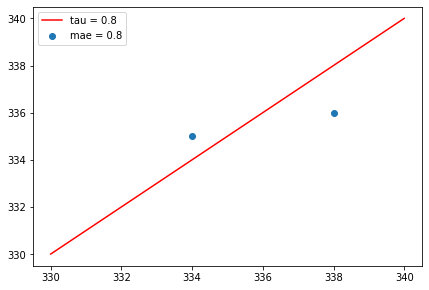

In [22]:
x = np.linspace(330,340,10)
y = np.linspace(330,340,10)
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.plot(x,y,'r')
plt.scatter([338,334],[336,335])
plt.savefig('redict.png')
plt.legend(['tau = 0.8','mae = 0.8'])
# plt.legend(['mae = 0.8'])
plt.show()

# plt.scatter(pred,true)

In [3]:
choice.append({'attacker': random.randint(0, 5), 'magnitude': random.uniform(0, 5),
                'step': random.randint(0, 20)})

In [6]:
choice

[{'attacker': 4, 'magnitude': 3.193435249274854, 'step': 6},
 {'attacker': 5, 'magnitude': 1.0717372411214736, 'step': 16}]

In [5]:
choice.append({'attacker': random.randint(0, 5), 'magnitude': random.uniform(0, 5),
                'step': random.randint(0, 20)})

In [7]:
random.randint(0,1)

1

In [15]:
random.randint(1,2)

2

In [1]:
a = [[{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'PGD_Attack_adaptive_stepsize', 'magnitude': 0.024948902671414815, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'CWLinf_Attack_adaptive_stepsize', 'magnitude': 0.02852687209318794, 'step': 17}, {'attacker': 'Skip', 'magnitude': 0.004082423056449989, 'step': 4}, {'attacker': 'PGD_Attack_adaptive_stepsize', 'magnitude': 0.008456012144049537, 'step': 13}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'PGD_Attack_adaptive_stepsize', 'magnitude': 0.024948902671414815, 'step': 17}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'CWLinf_Attack_adaptive_stepsize', 'magnitude': 0.02852687209318794, 'step': 17}, {'attacker': 'Skip', 'magnitude': 0.004082423056449989, 'step': 4}, {'attacker': 'PGD_Attack_adaptive_stepsize', 'magnitude': 0.008456012144049537, 'step': 13}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'CWLinf_Attack_adaptive_stepsize', 'magnitude': 0.02852687209318794, 'step': 17}, {'attacker': 'Skip', 'magnitude': 0.004082423056449989, 'step': 4}, {'attacker': 'PGD_Attack_adaptive_stepsize', 'magnitude': 0.008456012144049537, 'step': 13}], [{'attacker': 'CWLinf_Attack_adaptive_stepsize', 'magnitude': 0.02852687209318794, 'step': 17}, {'attacker': 'Skip', 'magnitude': 0.004082423056449989, 'step': 4}, {'attacker': 'PGD_Attack_adaptive_stepsize', 'magnitude': 0.008456012144049537, 'step': 13}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}], [{'attacker': 'GradientSignAttack', 'magnitude': 0.004173688472590026, 'step': 17}], [{'attacker': 'Skip', 'magnitude': 0.031762217757444255, 'step': 2}, {'attacker': 'MultiTargetedAttack', 'magnitude': 0.01988300969944596, 'step': 13}]]

In [2]:
len(a)

40

In [1]:
import torch
x=torch.tensor(3.0,requires_grad=False)

In [2]:
y=torch.pow(x,2)

In [3]:
print(x.requires_grad)
print(y.requires_grad)

False
False


In [4]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [6]:
print(x.grad)

tensor(6.)


In [7]:
print(y.grad)

None


/Applications/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


In [5]:
a = torch.ones([2, 2], requires_grad=True)
print(a.is_leaf)
# True

b = a + 2
print(b.is_leaf)

True
False


In [6]:
a = torch.ones([2, 2], requires_grad=True)
print(a.is_leaf)
# True

b = a 
print(b.is_leaf)

True
True


In [5]:
a = [1,2, 3]

In [6]:
b = [3, 5, 6]

In [11]:
pre = (a == b).nonzero()

AttributeError: 'bool' object has no attribute 'nonzero'

In [7]:
a == b

False

In [8]:
a

[1, 2, 3]

In [9]:
b

[3, 5, 6]

In [10]:
 (pred == test_labels).nonzero()

NameError: name 'pred' is not defined

In [1]:
x = [3, 4, 5 , 6]

In [2]:
import matplotlib.pyplot as plt 

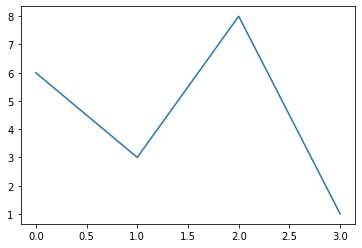

In [8]:
plt.plot(x)

In [4]:
y = [1, 2, 3, 4]

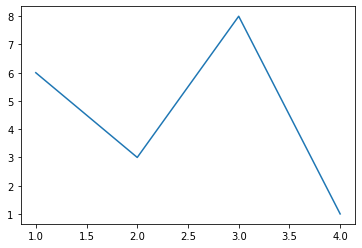

In [7]:
plt.plot(y,x)

In [6]:
x = [6, 3, 8 ,1]